# Coffee Analysis - Exploratory Analysis and Classification

Import the necessary libraries to graph and plot data

In [11]:
import numpy as np 
import pandas as pd 
import csv 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline


In [258]:
df = pd.read_csv('Coffee_Reviews_data_3.csv', index_col = 0)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3740 entries, 0 to 3739
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Product_Name      3740 non-null   object 
 1   Rating            3740 non-null   int64  
 2   Coffee_Origin     3740 non-null   object 
 3   Roast_level       3671 non-null   object 
 4   Agtron            3740 non-null   object 
 5   Est.Price         3702 non-null   object 
 6   Aroma_level       3732 non-null   float64
 7   Acidity_level     3732 non-null   float64
 8   Flavor_level      3732 non-null   float64
 9   Aftertaste_level  3731 non-null   float64
 10  Blind_assesment   3731 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 350.6+ KB


# Feature Engineering

Features that I will be manipulating are "Est.Price" and "Coffee_Origin". 

In the current dataframe, the prices of the coffee beans vary in price in several ways:
- Currency is different across coffee products (i.e. Hong Kong dollars, USD, Canadian dollars, etc.) 
- Pricing per unit (i.e. per 100 grams, per 2 ounces, per capsule, etc.) 

#### reprice_update function will reformat the prices of the coffee beans into USD per 100 grams.* 


For coffee origin, the country name is not the only words inside coffee_origin. The entries in this column vary in the following ways:
- Province 
- City
- Country

#### origin_sorter function will reformat the origin of the coffee beans into the region they are from (Africa, Americas, Asia)

For easier classification, I sorted the Coffee_Origin by continent instead of country, as there were too many different countries. Additionally, I did not include blends of coffee which use a mixture of coffee beans from varying regions.


#### quality function
Additionally, I will be adding one more feature: "Quality". The quality function takes the difference between the two agtron values. The first value gets the color of coffee beans before roast and the second value for after roast. Having a smaller difference indicates a more consistent roast. 

In [14]:
def reprice_update(x):
    try: 
        singles = x.split()

        if "NT" in singles:  #0.035 USD : 1 NT 
            if singles[-1] in ["ounces", "ounce", "oz."]:
                price = x.strip("NT").strip("ounces $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * (1/28.3495*100)*0.035 

                return(round(new_price,2))

            if singles[-1] in ["grams","gram","g"]:
                price = x.strip("NT").strip("gram grams $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * 100 * 0.035
                return(round(new_price,2))

        elif "CAD" in singles: #0.78 USD : 1 CAD
            if singles[-1] in ["ounces", "ounce", "oz."]:
                price = x.strip("CAD").strip("ounces $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * (1/28.3495*100)*0.78 

                return(round(new_price,2))

            if singles[-1] in ["grams","gram","g"]:
                price = x.strip("CAD").strip("gram grams $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * 100 * 0.78
                return(round(new_price,2))

        elif "HK" in singles: #0.13 USD : 1 HKD 
            if singles[-1] in ["ounces", "ounce", "oz."]:
                price = x.strip("HK").strip("ounces $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * (1/28.3495*100)*0.13 

                return(round(new_price,2))

            if singles[-1] in ["grams","gram","g"]:
                price = x.strip("HK").strip("gram grams $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * 100 * 0.13
                return(round(new_price,2))

        elif "US" in singles: #1 USD : 1 USD 
            if singles[-1] in ["ounces", "ounce", "oz."]:
                price = x.strip("US").strip("ounces $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * (1/28.3495*100)

                return(round(new_price,2))

            if singles[-1] in ["grams","gram","g"]:
                price = x.strip("US").strip("gram grams $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * 100 
                return(round(new_price,2))
            
        elif (singles[0] not in ["US","CAD","NT","HK"]): 
            
            if singles[-1] in ["ounces", "ounce", "oz."]:
                price = x.strip("US").strip("ounces $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * (1/28.3495*100)

                return(round(new_price,2))

            if singles[-1] in ["grams","gram","g"]:
                price = x.strip("US").strip("gram grams $ £").replace(',',"")
                price = price.split("/")
                new_price = float(price[0])/float(price[1]) * 100 
                return(round(new_price,2))

    except: 
        return None

In [44]:
import pycountry

from pycountry_convert import country_alpha2_to_continent_code, convert_continent_code_to_continent_name

In [107]:
def countriesbycontinent(cont):
    countries = []
    continent = []
    for i in range(len(pycountry.countries)):
        try:
            country_info = list(pycountry.countries)[i]
            country_name = country_info.name
            country_alpha2 = country_info.alpha_2

            cont_code = country_alpha2_to_continent_code(country_alpha2)
            continent_name = convert_continent_code_to_continent_name(cont_code)

            if continent_name == cont:
                countries.append(country_name)

            else: 
                continue
        
        except: 
            continue
            
    return [x.split()[0].strip(",") for x in countries]

In [109]:
def origin_sorter(x):  #This only sorts coffee beans with single origin, does not include blends 

    #     origins = ["Ethiopia", "Colombia", "Costa Rica", "Panama","Honduras","Guatemala", "Kenya", "Mexico", "Hawai’i", "Sumatra"]
    #     africa = ["Ethiopia", "Kenya","Africa", "Uganda", "Haiti", "Rwanda","Congo"]
    #     americas = ["Rica", "Panama", "Honduras", "Guatemala", "Mexico", "Salvador", 
    #               "Nicaragua", "Colombia", "Brazil", "Uruguay", "Peru", "Ecuador", "Bolivia"]
    #     asia = ["Sumatra","Thailand","Phillipines", "Vietnam", "Taiwan", "Indonesia"]
    #     south_am = ["Colombia", "Brazil", "Uruguay", "Peru"]

    
    africa = countriesbycontinent("Africa")
    asia = countriesbycontinent("Asia")
    americas = countriesbycontinent("South America")+countriesbycontinent("North America")
    
    coffee_origin = x.split()

    for country in africa:
        
        
        if country in coffee_origin:
            
            return "Africa"
            
        
        else:
            continue       
            
    
    for country in americas:
        
        
        if country in coffee_origin:
            
            return "Americas"
            
        
        else:
            continue       
        
    for country in asia:
        
        
        if country in coffee_origin:
            
            return "Asia"
            
        
        else:
            continue  
    

In [94]:
def quality(x):
    try:
        roast_color = x.split("/")
        quality = int(roast_color[1])-int(roast_color[0])
    
        return quality 
    
    except:
        return None

In [259]:
df["Quality"] = df["Agtron"].apply(quality)

In [260]:
df["Est.Price"] = df["Est.Price"].apply(reprice_update)  #changing price to $ per 100 grams
df["Coffee_Origin"] = df["Coffee_Origin"].apply(origin_sorter) #simplfying the origin
df['Coffee_Origin'].fillna(value="Other", inplace=True)

In [262]:
df.head()

,Product_Name,Rating,Coffee_Origin,Roast_level,Agtron,Est.Price,Aroma_level,Acidity_level,Flavor_level,Aftertaste_level,Blind_assesment,Quality
0,Colombia Planadas,92,Americas,Medium-Light,52/70,4.41,9.0,8.0,8.0,9.0,Chocolaty and sweetly nut-toned. Baking chocol...,18.0
1,Ethiopia Sidama Bensa Bekele,91,Africa,Medium-Light,57/77,6.17,8.0,8.0,8.0,9.0,"Crisply sweet, citrusy. Orange zest, cocoa pow...",20.0
2,Bowstring Christmas Blend,92,Africa,Medium,50/66,5.88,9.0,8.0,8.0,9.0,"Sweet-toned, chocolaty. Baking chocolate, date...",16.0
3,Peru Yanesha Geisha,94,Americas,Medium-Light,61/79,6.94,9.0,9.0,9.0,9.0,"Deeply floral, cocoa-toned. Lilac, dark chocol...",18.0
4,Vertical Support Espresso,90,Other,Medium,46/60,4.12,8.0,8.0,9.0,7.0,Evaluated as espresso. Chocolaty and nut-toned...,14.0


In [263]:
df["Coffee_Origin"].value_counts()  

Other       1400
Africa      1092
Americas    1076
Asia         172
Name: Coffee_Origin, dtype: int64

#### We can see that there is a significant number of blends in these reviews. They will be removed to focus on classifying coffees from a single origin.

In [222]:
pd.set_option('display.max_columns', None)

In [264]:
data1 = df[df["Coffee_Origin"]!= "Other"]

descr = (df[["Coffee_Origin","Aroma_level","Acidity_level", "Flavor_level","Aftertaste_level"]].groupby("Coffee_Origin").describe())
# round(df[df["Coffee_Origin"]=="Africa"].describe(),2)
descr

Aroma_level                                                \
                    count      mean       std  min  25%  50%  75%   max   
Coffee_Origin                                                             
Africa             1090.0  8.751376  0.545137  4.0  9.0  9.0  9.0  10.0   
Americas           1074.0  8.599628  0.698714  2.0  8.0  9.0  9.0  10.0   
Asia                171.0  8.608187  0.714343  4.0  8.0  9.0  9.0  10.0   
Other              1397.0  8.494631  0.790891  2.0  8.0  9.0  9.0  10.0   

              Acidity_level                                                \
                      count      mean       std  min  25%  50%  75%   max   
Coffee_Origin                                                               
Africa               1090.0  8.400000  0.638237  2.0  8.0  8.0  9.0   9.0   
Americas             1074.0  8.234637  0.750813  1.0  8.0  8.0  9.0  10.0   
Asia                  171.0  8.280702  0.768981  4.0  8.0  8.0  9.0   9.0   
Other                1397.0  8.141732  0.820553  1.0  8.0  8.0  9.0  10.0   

              Flavor_level                                                \
                     count      mean       std  min  25%  50%  75%   max   
Coffee_Origin                                                              
Africa              1090.0  8.538532  0.562757  6.0  8.0  9.0  9.0  10.0   
Americas            1074.0  8.429236  0.612941  5.0  8.0  8.0  9.0  10.0   
Asia                 171.0  8.502924  0.567495  7.0  8.0  9.0  9.0  10.0   
Other               1397.0  8.280601  0.621951  5.0  8.0  8.0  9.0  10.0   

              Aftertaste_level                                                
                         count      mean       std  min  25%  50%  75%   max  
Coffee_Origin                                                                 
Africa                  1089.0  8.760331  0.646289  2.0  9.0  9.0  9.0  10.0  
Americas                1074.0  8.670391  0.759726  1.0  8.0  9.0  9.0  10.0  
Asia                     171.0  8.701754  0.818138  3.0  8.0  9.0  9.0  10.0  
Other                   1397.0  8.568361  0.882300  2.0  8.0  9.0  9.0  10.0

#### Seeing the descriptive statistics here, there is not much variation in the Aroma, Acidity, Flavor, and Aftertaste levels across each region. They all seem to range mostly between 8-9 and this can make it difficult for classifier algorithims to distinguish the coffee origins. 

In [269]:
rating = (df[["Coffee_Origin", "Rating"]].groupby("Coffee_Origin").describe())
rating

Rating                                                   
                count       mean       std   min   25%   50%   75%   max
Coffee_Origin                                                           
Africa         1092.0  92.819597  1.786357  79.0  92.0  93.0  94.0  97.0
Americas       1076.0  92.036245  2.384755  67.0  91.0  92.0  93.0  98.0
Asia            172.0  91.970930  2.269625  83.0  91.0  92.0  93.0  97.0
Other          1400.0  91.362143  3.713218  52.0  90.0  92.0  93.0  97.0

In [145]:
df.groupby("Coffee_Origin").mean()

,Rating,Est.Price,Aroma_level,Acidity_level,Flavor_level,Aftertaste_level,Quality
Coffee_Origin,,,,,,,
Africa,92.819597,7.011495,8.751376,8.400000,8.538532,8.760331,19.750926
Americas,92.036245,9.795969,8.599628,8.234637,8.429236,8.670391,18.380506
Asia,91.970930,7.656389,8.608187,8.280702,8.502924,8.701754,18.350877
Other,91.362143,6.515147,8.494631,8.141732,8.280601,8.568361,17.044798


Text(0.5, 1.0, 'Average Ratings of Coffee Bean by Origin')

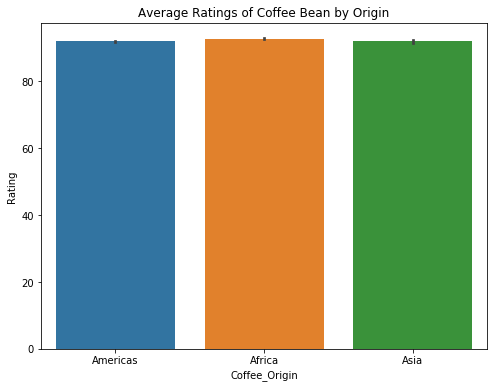

In [225]:
plt.figure(figsize =(8,6))

sns.barplot(x = "Coffee_Origin", y= "Rating", data= data1)

plt.title("Average Ratings of Coffee Bean by Origin")

In [284]:
flavor_profiles = df[["Coffee_Origin","Aroma_level","Acidity_level", "Flavor_level","Aftertaste_level"]].dropna()

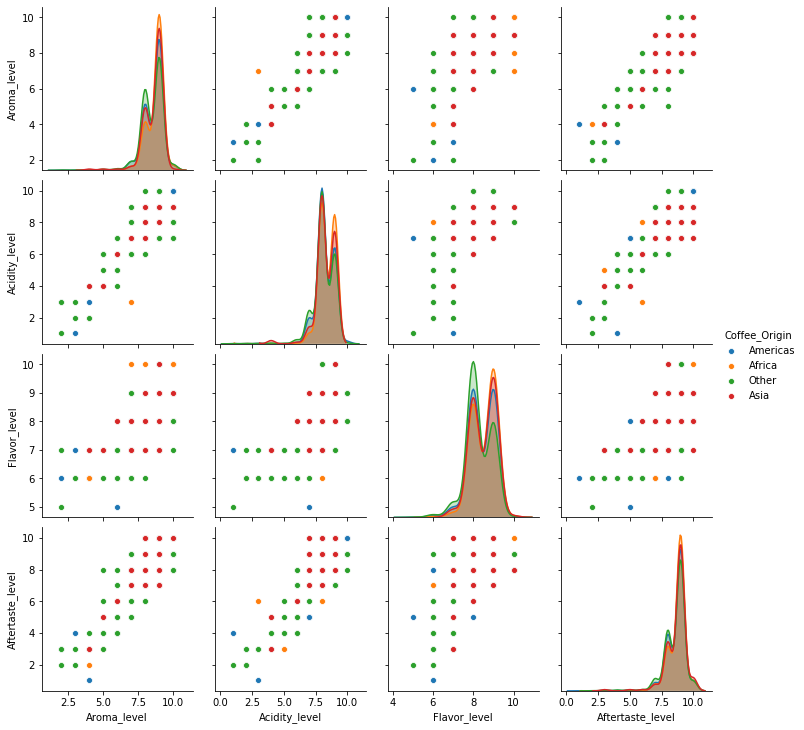

In [294]:
sns.pairplot(flavor_profiles, hue = "Coffee_Origin", diag_kws={'bw': 0.3})

Text(0.5, 1.0, 'Acidity Level distribution across Coffee_Origin')

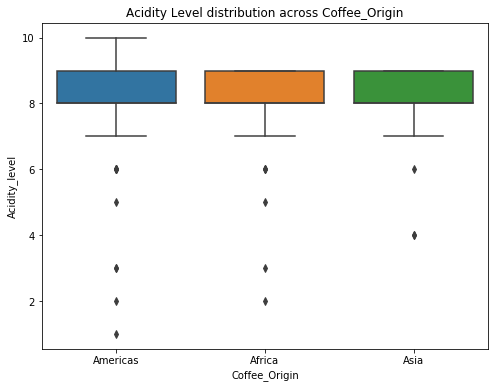

In [274]:
plt.figure(figsize =(8,6))
sns.boxplot(x="Coffee_Origin",y="Acidity_level", data = data1)
plt.title("Acidity Level distribution across Coffee_Origin")

Average price of coffee per 100 grams: $ 7.68


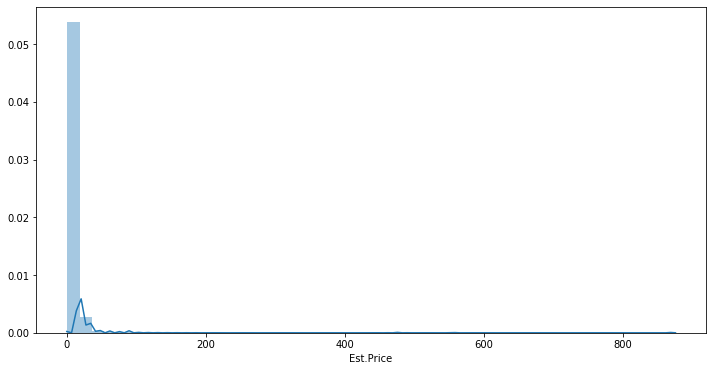

In [164]:
plt.figure(figsize =(12,6))
sns.distplot(df["Est.Price"])
print("Average price of coffee per 100 grams: $", round(df["Est.Price"].mean(), 2))

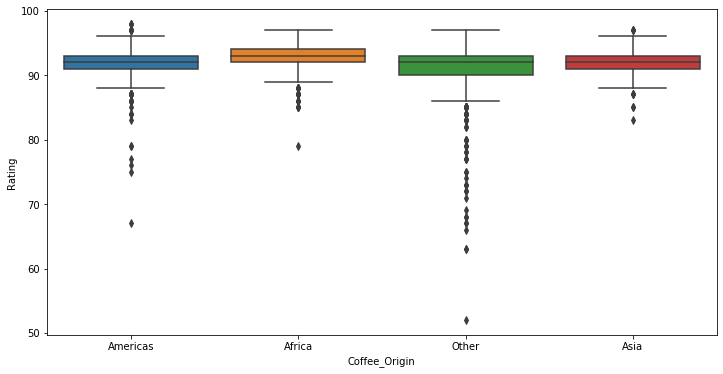

In [171]:
plt.figure(figsize =(12,6))
sns.boxplot(x="Coffee_Origin",y="Rating", data = df)

## Data Analysis Takeaways 
The plots indicate that there is no key significant feature that would help distinguish the different coffee types by origin, which can be difficult to predict coffee type by the characteristics assigned by the coffee reviewer. 

It is also interesting to see that the coffee reviews for each region have an average score of 90-92. The coffee reviewers on this website are either very lenient or their scoring metrics may be flawed in the sense that it assigns most coffee beans a relatively high score. 

## Preparing Data
In this section, I am dropping data columns that may not be suitable/necessary for classifier algorithims such as paragraphs of reviews, agtron value (converted to quality earlier), and the product name. 

Additionally, the coffee origin and roast level is converted to categorical data. 

In [241]:
df.drop(['Blind_assesment','Product_Name','Agtron'], axis = 1, inplace = True)
df = df[df.Coffee_Origin != "Other"]


In [242]:
df.dropna(subset = ['Est.Price'], axis = 0, inplace=True)
df.dropna(subset = ['Quality'], axis = 0, inplace=True)

Categorical data is converted to numerical data using cat.codes

In [243]:
df["Coffee_Origin"] = df["Coffee_Origin"].astype("category").cat.codes
df["Roast_level"] = df["Roast_level"].astype("category").cat.codes

# df2[["Rating","Aroma_level","Acidity_level","Flavor_level","Aftertaste_level"]] = df2[["Rating","Aroma_level","Acidity_level","Flavor_level","Aftertaste_level"]].astype(float)
df[["Aroma_level","Acidity_level","Flavor_level","Aftertaste_level"]] = df[["Aroma_level","Acidity_level","Flavor_level","Aftertaste_level"]].astype(float)



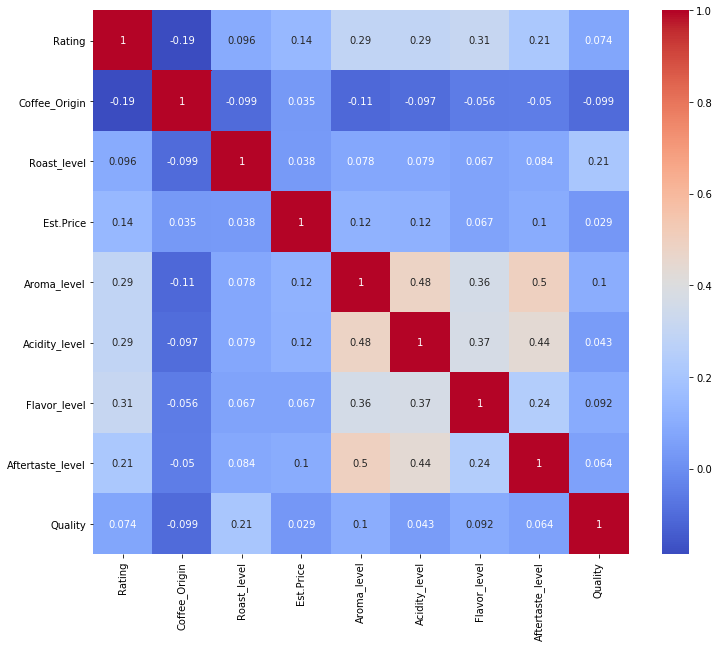

In [256]:
plt.figure(figsize =(12,10))

sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm')

Rating              0
Coffee_Origin       0
Roast_level         0
Est.Price           0
Aroma_level         0
Acidity_level       0
Flavor_level        0
Aftertaste_level    0
Quality             0
dtype: int64

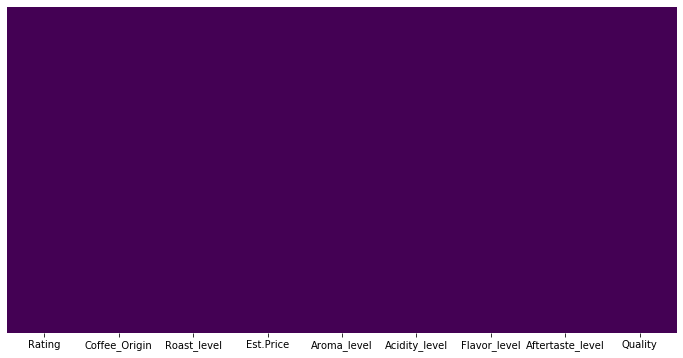

In [245]:
plt.figure(figsize =(12,6))
sns.heatmap(df.isnull(), cmap = 'viridis', yticklabels = False, cbar = False)

df.isnull().sum()

## Classifying Model - Random Forest Model 

Out of the various classifier models (XGBoost, Support Vector Machines, Decision trees), Random Forest Classifier yielded the highest accuracy. With the data, RFC has the advantage when intaking multiple features to classify, as random forest can determine which features are most important when making a prediction. At the bottom, I include which features RFC determined to be the most important when making the predictions

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [126]:
from sklearn.metrics import accuracy_score

In [246]:
X = df.drop('Coffee_Origin', axis = 1)
y = df['Coffee_Origin']

In [247]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, shuffle = True)

In [248]:
rfc = RandomForestClassifier(n_estimators=900, random_state = 21)

In [249]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=21, verbose=0,
                       warm_start=False)

In [250]:
rfc_pred = rfc.predict(X_test)

In [251]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[356 225   4]
 [248 283  15]
 [ 47  41   1]]
              precision    recall  f1-score   support

           0       0.55      0.61      0.58       585
           1       0.52      0.52      0.52       546
           2       0.05      0.01      0.02        89

    accuracy                           0.52      1220
   macro avg       0.37      0.38      0.37      1220
weighted avg       0.50      0.52      0.51      1220



In [252]:
accuracy_score(y_test, rfc_pred, normalize=True, sample_weight=None)

0.5245901639344263

In [184]:
labels = list(df.columns)

In [185]:
importances = list(rfc.feature_importances_)

[(label,importance) for label,importance in zip(labels,importances)]
    
    
#     feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

[('Rating', 0.14610218997856667),
 ('Coffee_Origin', 0.06826659806584426),
 ('Roast_level', 0.3483138434521311),
 ('Est.Price', 0.04567209281246169),
 ('Aroma_level', 0.04914778738516699),
 ('Acidity_level', 0.04884577577730529),
 ('Flavor_level', 0.06045605224592099),
 ('Aftertaste_level', 0.23319566028260305)]

## Conclusion 

Using a Random Forest Classifier results in around __52-55% accuracy__ in detecting the correct origin from where the coffee is from using the features listed above. 

Ways to improve accuracy: 
- Getting rid of unnecessary features in the dataset 
- Write a better origin function that gets more data points for each region OR simply get more data points (Asia only had about 200 entries and can benefit from having a lot more) 
- Adjust more parameters of RFC 
- Use a different data set that qualiatively shows differences in the coffee bean. (Not ideal and may not even be necessary with continued improvements)   
 -This suggestion is more a quick fix/unrealistic method of improving model performance